
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

# Práctica 5 (Parte II). Transformada de Fourier

### Introducción
Joseph Fourier fue un matemático del siglo 18 que descubrió que todas las funciones con formas onduladas se pueden representar mediante una suma de sinusoidales de diferentes frecuencias y con diferentes amplitudes. Este mecanismo es el principio de la Transformada de Fourier TF. 
Una imagen se puede ver como una señal 2d (funcion 2d) y por lo tanto es susceptible de describir una imagen como un conjunto de fuciones senos 2d. La utilidad de aplicar la TF es que nos permite identificar regiones de la imagen en que los valores de los pixeles cambian mucho, o regiones más constantes. Por lo tanto analizando la TF de una imagen podemos etiquetar esa región como de interés, o ruido, fondo, primer plano, etc.
Por lo tanto, haciendo un análisis de una imagen en el dominio de Fourier podemos realizar tareas como emborronamiento, detección de aristas, umbralización, analisis de texturas e incluso detectar si existe emborronamiento.

OpenCV tiene las funcion  **cv2.dft()** para obtener la TF de una imagen y la función **cv2.idft()** para a partir TF recuperar la imagen en el dominio espacial. 
En el siguiente código podemos ver para una imagen síntética su transformada de Fourier (espectro de la magnitud y fase).

(<matplotlib.image.AxesImage at 0x1f619f55848>, Text(0.5, 1.0, 'Recuperada'))

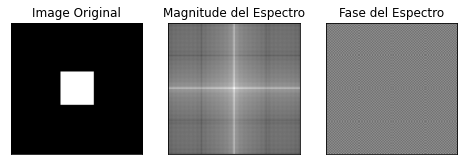

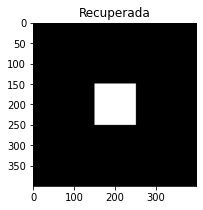

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = np.zeros((400,400), dtype = "uint8") 
cv2.rectangle(img, (150,150), (250,250), (255,255,255), -1)


img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1],True)

#Para obtener la imagen original
idft_shift = np.fft.ifftshift(dft_shift)
img_rec=cv2.idft(idft_shift, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT);
plt.figure(figsize=(8,8))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude del Espectro'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Fase del Espectro'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(3,3))
plt.imshow(img_rec,'gray'),plt.title('Recuperada')

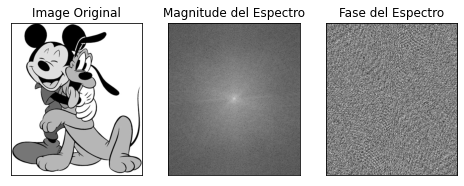

In [4]:
#Aplicar sobre una imagen de grises
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1],True)
plt.figure(figsize=(8,8))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude del Espectro'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Fase del Espectro'), plt.xticks([]), plt.yticks([])
plt.show()         

## Armónicos.
Vamos a visualizar ahora determinados armónicos. Para ellosactivamos determinadas frecuencias en el dominio de Fourier para luego obtener la transformada inversa de Fourier y visualizar en el dominio espacial.

(<matplotlib.axes._subplots.AxesSubplot at 0x1f619b0ebc8>,
 Text(0.5, 1.0, 'Suma'))

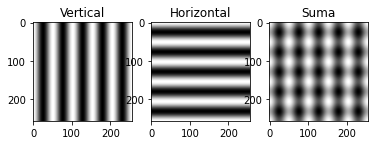

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Opencv representa los complejos como un matriz con dos columnas
#una para la parte real y otra para la parte imaginaria
F=np.zeros((256,256,2));
#Componente verticales
FV=F.copy()
FV[0,5,0]=1
#Componente horizontales
FH=F.copy();
FH[5,0,0]=1;
Fsuma =FV+FH
IFv= cv2.idft(FV, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
IFh= cv2.idft(FH, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
IFs= cv2.idft(Fsuma, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
plt.subplot(1,3,1),plt.imshow(IFv,'gray'),plt.title('Vertical')
plt.subplot(1,3,2),plt.imshow(IFh,'gray'),plt.title('Horizontal')  
plt.subplot(1,3,3),plt.imshow(IFs,'gray'),plt.title('Suma')  


Podemos seleccionar armónicos que estén dentro de un area. Por ejemplo dentro de un disco como se muestra a continuación.

(<matplotlib.axes._subplots.AxesSubplot at 0x1f61b6867c8>,
 Text(0.5, 1.0, 'Armonicos'))

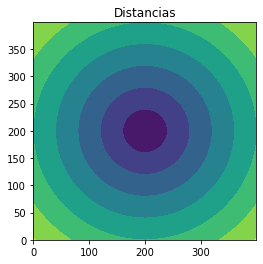

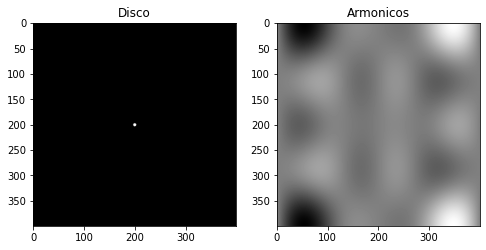

In [6]:
#Armonicos que en un disco de radio 2 centrado en la %frecuencia 302 200
import numpy as np
import cv2
from matplotlib import pyplot as plt

F=np.zeros((400,400,2))
dist=np.zeros((400,400));
mi=400/2;
mj=400/2;
i_ind=np.arange(400)
j_ind=np.arange(400)
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);
radius=3
F[:,:,0]=np.where(dist<=radius,1,0);
#F[:,:,1]=np.where(dist<=radius,1,0);
F[:,:,1]=0
#Obtenemos los armonicos en el dominio espacial
iF = np.fft.ifftshift(F)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
plt.figure(figsize=(4,4));
plt.contourf(j_ind,i_ind,dist),plt.title("Distancias")
plt.figure(figsize=(8,8));
plt.subplot(1,2,1),plt.imshow(F[:,:,0],'gray'),plt.title("Disco")
plt.subplot(1,2,2),plt.imshow(IF,'gray'),plt.title("Armonicos")


### Filtrado Paso Bajo (LPF)
Podemos obtener como ese mecanismo de selección de armónicos que información afecta a una imagen, simplemente multiplicando en el dominio de forier la imagen y la selección (Filtro). Si eliminamos las frecuencias altas del contenido frecuencial de una image estamos aplicando un filtro paso bajo. Los tres tipos de filtro LPF que vamos a ver es:
* Filtro Paso Bajo ideal
* Filtros Paso bajo gaussiano
* Filtros Paso bajo Butterworth
El efecto de estos filtros es emborronar la imagen. Puede ser interesante para una imagen con ruido aplicar un filtros paso bajo como presprocesamiento. 



(<matplotlib.axes._subplots.AxesSubplot at 0x1f61c635408>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

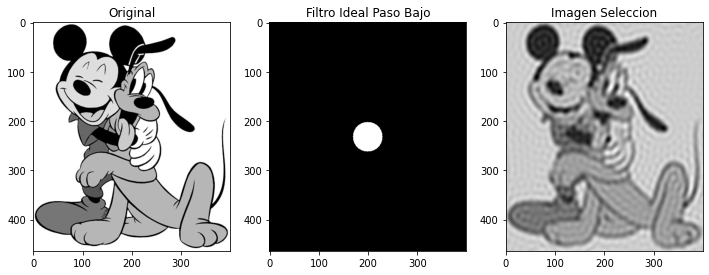

In [7]:
#Filtro Paso Bajo Ideal
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);
radius=30
F[:,:,0]=np.where(dist<=radius,1,0);
F[:,:,1]=np.where(dist<=radius,1,0);

#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro Ideal Paso Bajo")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")


Con el filtro paso bajo ideal surge un efecto no deseado en la imagen de salida que es el anillmiento. Veamos en el siguiente ejemplo el filtro paso bajo con una gaussiana

(<matplotlib.axes._subplots.AxesSubplot at 0x1f61a2f1288>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

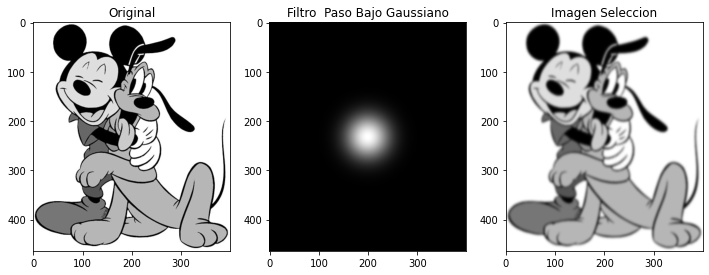

In [8]:

#Filtro Paso Bajo gaussiano
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

sigma =30;

F[:,:,0]=np.exp(-(dist*dist)/(2*(sigma*sigma))); 
F[:,:,1]=np.exp(-(dist**2)/(2*(sigma*sigma))); 
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro  Paso Bajo Gaussiano")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")





A continuación veamos el filtro Butterworth.

(<matplotlib.axes._subplots.AxesSubplot at 0x1f61a3a1108>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

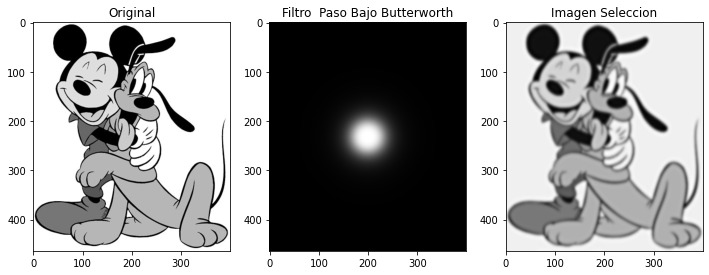

In [9]:

#Filtro Paso Butterworth
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

D0=35; n=2

F[:,:,0]=1/(1+(dist/D0)**(2*n));
F[:,:,1]=1/(1+(dist/D0)**(2*n));
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro  Paso Bajo Butterworth")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")





### Filtrado Paso Alto (HPF)
Si eliminamos las frecuencias bajos  del contenido frecuencial de una image estamos aplicando un filtro paso bajo. Los tres tipos de filtro HPF que vamos a ver es:
* Filtro Paso Alto ideal
* Filtros Paso Alto gaussiano
* Filtros Paso Alto Butterworth
El efecto de estos filtros es un efecto frotera en la imagen.


(<matplotlib.axes._subplots.AxesSubplot at 0x1f61a100548>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

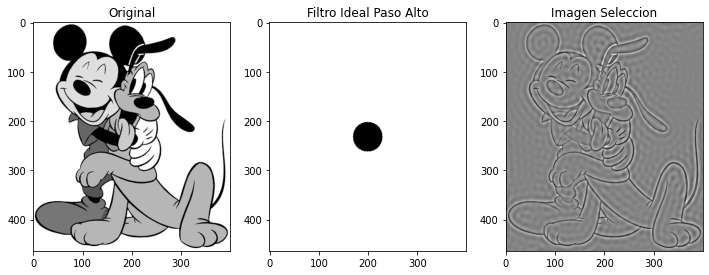

In [10]:
#Filtro Paso Bajo Ideal
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);
radius=30
F[:,:,0]=np.where(dist>radius,1,0);
F[:,:,1]=np.where(dist>radius,1,0);

#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro Ideal Paso Alto")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")


Con el filtro paso alto ideal surge un efecto no deseado en la imagen de salida que es como una doble frontera. Veamos en el siguiente ejemplo el filtro paso bajo con una gaussiana

(<matplotlib.axes._subplots.AxesSubplot at 0x1f61a4010c8>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

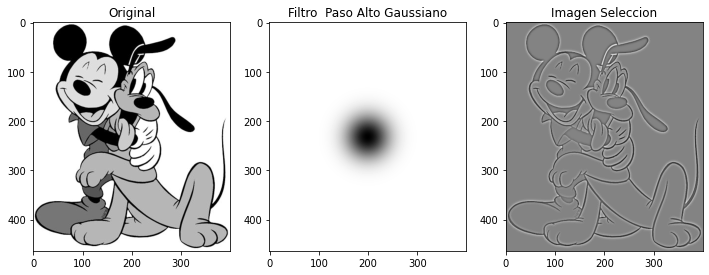

In [11]:

#Filtro Paso Bajo gaussiano
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

sigma =30;

F[:,:,0]=1-np.exp(-(dist*dist)/(2*(sigma*sigma))); 
F[:,:,1]=1-np.exp(-(dist**2)/(2*(sigma*sigma))); 
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro  Paso Alto Gaussiano")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")





A continuación veamos el filtro Butterworth.

C:\Users\Ithiel\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Ithiel\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


(<matplotlib.axes._subplots.AxesSubplot at 0x1f61bb09348>,
 Text(0.5, 1.0, 'Imagen Seleccion'))

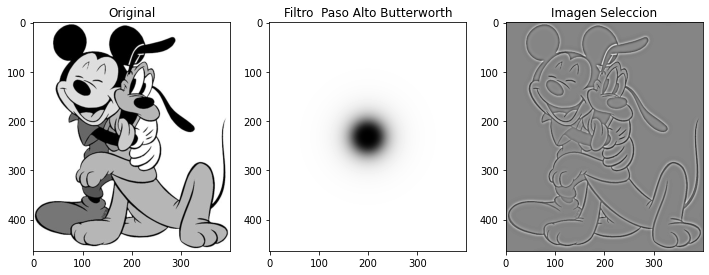

In [12]:

#Filtro Paso Butterworth
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

D0=35; n=2

F[:,:,0]=1/(1+(D0/dist)**(2*n));
F[:,:,1]=1/(1+(D0/dist)**(2*n));
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 
#IF= cv2.idft(iF); 
#IF = cv2.magnitude(IF[:,:,0],IF[:,:,1])

plt.figure(figsize=(12,12));
plt.subplot(1,3,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(F[:,:,0],'gray'),plt.title("Filtro  Paso Alto Butterworth")
plt.subplot(1,3,3),plt.imshow(IF,'gray'),plt.title("Imagen Seleccion")





### Ejemplo: Como detectar el emborronamiento 
El objetivo es usando la información frecuencial detectar si una imagen esta emborronada o no. Para ello se elimina la información de frecuencias bajas, p.ej aplicando un filtro paso alto ideal. Y obtenemos la energía media que queda. Si esta es menor que un determinado umbral entonces la imagen esta emborronada. 



In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def detect_emborronamiento_fft(image, size=60, thresh=10, vis=False):
    #Tomamos las dimensiones de la imagen y usamos 
    #y determinamos el centro
    
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))
    img_float32=np.float32(image)
    #aplicamos la transformada de fourier
    dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift= np.fft.fftshift(dft)#centramos
    #si queremos visualizar la salida
    if vis:
        #Calculamos la magnitud del espectro
        magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
        #mostramos la imagen original
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap="gray")
        ax[0].set_title("Original")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        #mostramos la magnitud
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitud")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
    #Anulamos un recuadro de tamaño sizexsize
    dft_shift[cY - size:cY + size, cX - size:cX + size] = 0
    dft_shift = np.fft.ifftshift(dft_shift)
    recon = cv2.idft(dft_shift)   
    # Calculamos la magnitud de la imagen reconstruida
    # y la media  (otra forma de obtener la magnitud)
    
    magnitude = 20 * np.log(cv2.magnitude(recon[:,:,0],recon[:,:,1])) 
    mean = np.mean(magnitude)
    #La imagen esta emborronada si el valor medio de la mangnitude es 
    #menor que un umbral.
    return (mean, mean <= thresh)

#Con esta funcion pretenemos obtener un umbral
#para saber cuando la imagen esta emborronada
def getUmbral(i): 
    return 0


Vamos a probar el anterior código emborronando una imagen con una gausiana. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

gray = cv2.imread('miki_pluto.jpg',0)
width=450;
h,w=gray.shape;
factor = float(width/w)
hnew = int(h*factor)
gray = cv2.resize(gray, (hnew,width),cv2.INTER_AREA)
thr=240;

#Ejercicio estudiar formas de implementar la funcion getUmbral 
#thr = getUmbral(gray,0.75)

#Hacemos un bucle para obtener diferentes
#imagenes emborronadas
for radius in range(1, 30, 2):
    # clonamos la imagen original
    image = gray.copy()
    # Emborronamiento Gaussiano 
    image = cv2.GaussianBlur(image, (radius, radius),0)
    # apply our blur detector using the FFT
    (mean, blurry) = detect_emborronamiento_fft(image, size=60,thresh=thr)
    # escribimos en la imagen si esta emborronada o no y el promedio de energia
    #Creamos una imagen de color para escribir
    image = np.dstack([image] * 3) 
    color = (0, 0, 255) if blurry else (0, 255, 0)
    text = "Emborronada ({:.4f})" if blurry else "Sin Emborronamiento ({:.4f})"
    text = text.format(mean)
    cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, color, 2)
    print("[INFO] Kernel: {}, Resultado: {}".format(radius, text))
    # mostramos la imagen
    cv2.imshow("Imagen Test", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()


[INFO] Kernel: 1, Resultado: Sin Emborronamiento (283.8544)
[INFO] Kernel: 3, Resultado: Sin Emborronamiento (279.1232)
[INFO] Kernel: 5, Resultado: Sin Emborronamiento (274.6023)
[INFO] Kernel: 7, Resultado: Sin Emborronamiento (266.6874)
[INFO] Kernel: 9, Resultado: Sin Emborronamiento (259.3880)
[INFO] Kernel: 11, Resultado: Sin Emborronamiento (250.7209)
[INFO] Kernel: 13, Resultado: Sin Emborronamiento (240.4409)
[INFO] Kernel: 15, Resultado: Emborronada (231.1361)
[INFO] Kernel: 17, Resultado: Emborronada (222.3088)
[INFO] Kernel: 19, Resultado: Emborronada (210.5186)
[INFO] Kernel: 21, Resultado: Emborronada (208.3491)
[INFO] Kernel: 23, Resultado: Emborronada (203.8276)
[INFO] Kernel: 25, Resultado: Emborronada (201.0379)
[INFO] Kernel: 27, Resultado: Emborronada (199.6557)
[INFO] Kernel: 29, Resultado: Emborronada (199.0552)


## Ejercicios
<ol>
<li>Obtener una imagen $400\times 400$ que contenga un círculo blanco en el centro. Obtener la transformada de fourier.Mostrar el espectro y la fase. 
<li> Aplica el filtro paso bajo ideal, gausiano y Butterworth sobre la imagen dalmata.jpg. Explica que pasa cuando en el filtro paso bajo Butterworth el n cambia.     
<li>Aplica el filtro paso alto ideal, gausiano y Butterworth sobre la imagen dalmata.jpg. 
Explica que pasa cuando en el filtro paso bajo Butterworth el n cambia.         
<li>Mejorar el código de la detección de emborronamiento de una imagen obteniendo una implementación de la función getUmbral. 
</ol>    
    

###### 1º Obtener una imagen  400×400  que contenga un círculo blanco en el centro. Obtener la transformada de fourier.Mostrar el espectro y la fase.

(<matplotlib.image.AxesImage at 0x1f619dbf488>, Text(0.5, 1.0, 'Recuperada'))

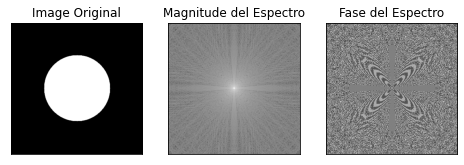

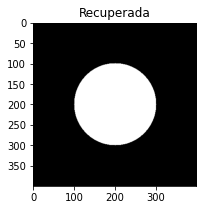

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = np.zeros((400,400), dtype = "uint8") 
cv2.circle(img, (200,200), 100, (255,255,255), -1)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1],True)

#Para obtener la imagen original
idft_shift = np.fft.ifftshift(dft_shift)
img_rec=cv2.idft(idft_shift, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT);
plt.figure(figsize=(8,8))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude del Espectro'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Fase del Espectro'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(3,3))
plt.imshow(img_rec,'gray'),plt.title('Recuperada')

###### 2º Aplica el filtro paso bajo ideal, gausiano y Butterworth sobre la imagen dalmata.jpg. Explica que pasa cuando en el filtro paso bajo Butterworth el n cambia.

(<matplotlib.axes._subplots.AxesSubplot at 0x1f61c4d3208>,
 Text(0.5, 1.0, 'Filtro Paso Bajo Butterworth'))

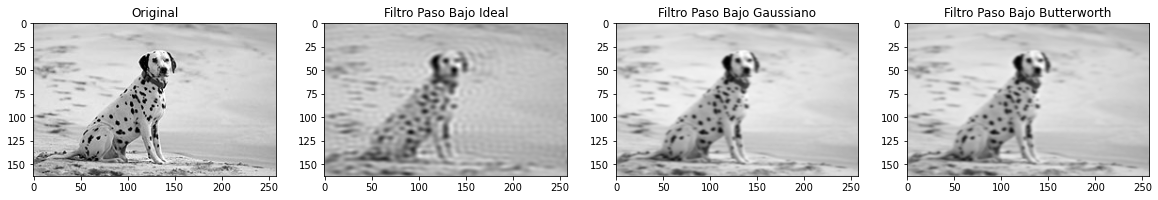

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dalmata.jpg",0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);
radius=30
F[:,:,0]=np.where(dist<=radius,1,0);
F[:,:,1]=np.where(dist<=radius,1,0);

#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.figure(figsize=(20,20));
plt.subplot(1,4,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,4,2),plt.imshow(IF,'gray'),plt.title("Filtro Paso Bajo Ideal")


img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

sigma =30;

F[:,:,0]=np.exp(-(dist*dist)/(2*(sigma*sigma))); 
F[:,:,1]=np.exp(-(dist**2)/(2*(sigma*sigma))); 
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.subplot(1,4,3),plt.imshow(IF,'gray'),plt.title("Filtro Paso Bajo Gaussiano")

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

D0=35; n=2

F[:,:,0]=1/(1+(dist/D0)**(2*n));
F[:,:,1]=1/(1+(dist/D0)**(2*n));
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.subplot(1,4,4),plt.imshow(IF,'gray'),plt.title("Filtro Paso Bajo Butterworth")

En el filtro butterworth la N se emplea para indicar la forma de la campana. Conforme el n es mas grande nos dice si la campana es mas achatada o abrupta, cuanto mayor es, mas achatado el filtro.  

###### 3º Aplica el filtro paso alto ideal, gausiano y Butterworth sobre la imagen dalmata.jpg. Explica que pasa cuando en el filtro paso bajo Butterworth el n cambia.

C:\Users\Ithiel\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Ithiel\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide


(<matplotlib.axes._subplots.AxesSubplot at 0x1f61b7b10c8>,
 Text(0.5, 1.0, 'Butterworth'))

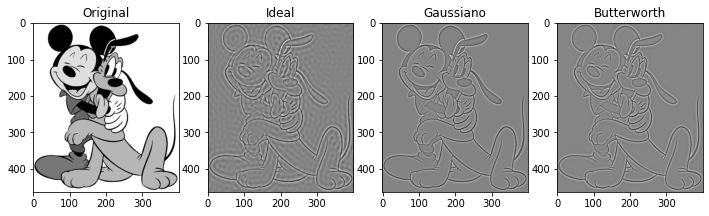

In [18]:
#Filtro Paso Bajo Ideal
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg',0)

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);
radius=30
F[:,:,0]=np.where(dist>radius,1,0);
F[:,:,1]=np.where(dist>radius,1,0);

#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.figure(figsize=(12,12));
plt.subplot(1,4,1),plt.imshow(img,'gray'),plt.title("Original")
plt.subplot(1,4,2),plt.imshow(IF,'gray'),plt.title("Ideal")

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

sigma =30;

F[:,:,0]=1-np.exp(-(dist*dist)/(2*(sigma*sigma))); 
F[:,:,1]=1-np.exp(-(dist**2)/(2*(sigma*sigma))); 
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.subplot(1,4,3),plt.imshow(IF,'gray'),plt.title("Gaussiano")

img_float32 =np.float32(img)
#obtenemos TF de la imagen de entrada
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

F=np.zeros((img.shape[0],img.shape[1],2))
dist=np.zeros(F.shape[:2]);
mi=img.shape[0]/2;
mj=img.shape[1]/2;
i_ind=np.arange(img.shape[0])
j_ind=np.arange(img.shape[1])
xx, yy = np.meshgrid(j_ind, i_ind, sparse=True)
dist=np.hypot(yy-mi,xx-mj);

D0=35; n=2

F[:,:,0]=1/(1+(D0/dist)**(2*n));
F[:,:,1]=1/(1+(D0/dist)**(2*n));
#Multiplicamos con la selección F obtenida 

dft_sel=dft_shift * F #multiplicacion punto a punto
#Obtenemos la iTF a ver que selecciona
iF = np.fft.ifftshift(dft_sel)
IF= cv2.idft(iF, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT); 

plt.subplot(1,4,4),plt.imshow(IF,'gray'),plt.title("Butterworth")


###### 4º Mejorar el código de la detección de emborronamiento de una imagen obteniendo una implementación de la función getUmbral.

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def detect_emborronamiento_fft(image, size=60, thresh=10, vis=False):
    #Tomamos las dimensiones de la imagen y usamos 
    #y determinamos el centro
    
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))
    img_float32=np.float32(image)
    #aplicamos la transformada de fourier
    dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift= np.fft.fftshift(dft)#centramos
    #si queremos visualizar la salida
    if vis:
        #Calculamos la magnitud del espectro
        magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
        #mostramos la imagen original
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap="gray")
        ax[0].set_title("Original")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        #mostramos la magnitud
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitud")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
    #Anulamos un recuadro de tamaño sizexsize
    dft_shift[cY - size:cY + size, cX - size:cX + size] = 0
    dft_shift = np.fft.ifftshift(dft_shift)
    recon = cv2.idft(dft_shift)   
    # Calculamos la magnitud de la imagen reconstruida
    # y la media  (otra forma de obtener la magnitud)
    
    magnitude = 20 * np.log(cv2.magnitude(recon[:,:,0],recon[:,:,1])) 
    mean = np.mean(magnitude)
    #La imagen esta emborronada si el valor medio de la mangnitude es 
    #menor que un umbral.
    return (mean, mean <= thresh)

#Con esta funcion pretenemos obtener un umbral
#para saber cuando la imagen esta emborronada
def getUmbral(img, perct): 
    #Almacenaremos todos los valores de los pixeles ordenados, finalmente, tomaremos el valor del .75 más frecuente y ese será el umbral
    pixels = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixels.append(img[i,j])
    pixels.sort()
    return pixels[int(len(pixels)*perct)]

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

gray = cv2.imread('miki_pluto.jpg',0)
width=450;
h,w=gray.shape;
factor = float(width/w)
hnew = int(h*factor)
gray = cv2.resize(gray, (hnew,width),cv2.INTER_AREA)
#thr=255;

#Ejercicio estudiar formas de implementar la funcion getUmbral 
thr = getUmbral(gray,0.75)

#Hacemos un bucle para obtener diferentes
#imagenes emborronadas
for radius in range(1, 30, 2):
    # clonamos la imagen original
    image = gray.copy()
    # Emborronamiento Gaussiano 
    image = cv2.GaussianBlur(image, (radius, radius),0)
    # apply our blur detector using the FFT
    (mean, blurry) = detect_emborronamiento_fft(image, size=60,thresh=thr)
    # escribimos en la imagen si esta emborronada o no y el promedio de energia
    #Creamos una imagen de color para escribir
    image = np.dstack([image] * 3) 
    color = (0, 0, 255) if blurry else (0, 255, 0)
    text = "Emborronada ({:.4f})" if blurry else "Sin Emborronamiento ({:.4f})"
    text = text.format(mean)
    cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, color, 2)
    print("[INFO] Kernel: {}, Resultado: {}".format(radius, text))
    # mostramos la imagen
    cv2.imshow("Imagen Test", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

[INFO] Kernel: 1, Resultado: Sin Emborronamiento (283.8544)
[INFO] Kernel: 3, Resultado: Sin Emborronamiento (279.1232)
[INFO] Kernel: 5, Resultado: Sin Emborronamiento (274.6023)
[INFO] Kernel: 7, Resultado: Sin Emborronamiento (266.6874)
[INFO] Kernel: 9, Resultado: Sin Emborronamiento (259.3880)
[INFO] Kernel: 11, Resultado: Emborronada (250.7209)
[INFO] Kernel: 13, Resultado: Emborronada (240.4409)
[INFO] Kernel: 15, Resultado: Emborronada (231.1361)
[INFO] Kernel: 17, Resultado: Emborronada (222.3088)
[INFO] Kernel: 19, Resultado: Emborronada (210.5186)
[INFO] Kernel: 21, Resultado: Emborronada (208.3491)
[INFO] Kernel: 23, Resultado: Emborronada (203.8276)
[INFO] Kernel: 25, Resultado: Emborronada (201.0379)
[INFO] Kernel: 27, Resultado: Emborronada (199.6557)
[INFO] Kernel: 29, Resultado: Emborronada (199.0552)
